### Modeling Application Data

Step 3: Using the preprocessed data, we evaluate a number of candidate ML Classification algorithms, tune the best performing one, and look at our prediction performance.  We'll also do some dimensionality reduction to optimize for future steps.

### Imports

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visuals as vs

from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import fbeta_score, roc_auc_score, roc_curve, auc

# Pretty display for notebooks
%matplotlib inline

# Show all of the data in a dataframe
pd.set_option('display.max_columns', None)

### Load Data

In [3]:
# Training Set
application_train = pd.read_csv('data/tmp/application_train_preprocessed_outliers_removed_abs_no_log.csv', index_col=0)
application_test = pd.read_csv('data/tmp/application_test_preprocessed_outliers_removed_abs_no_log.csv', index_col=0)
print("Loaded Training Set: {0} rows {1} cols".format(application_train.shape[0], application_train.shape[1]))
print("Loaded Testing Set: {0} rows {1} cols".format(application_test.shape[0], application_train.shape[1]))

Loaded Training Set: 307511 rows 269 cols
Loaded Testing Set: 48744 rows 269 cols


In [4]:
display(application_train.head())
display(application_test.head())

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

### Define Target Criteria

In [15]:
# Our goal is to identify clients with payment difficulties
# This is defined by the TARGET feature (1 = payment difficulites, 0 = pays as expected)
target_train = application_train['TARGET']
application_train_no_target = application_train.drop('TARGET', axis = 1)

# Note: There's no TARGET column in Kaggle's test set.
# application_test_no_target = application_test.drop('TARGET', axis=1)

# We don't want to include the unique identifiers because our classifier would interpret them as a feature
application_train_noID = application_train_no_target.drop('SK_ID_CURR', axis=1)
application_test_noID = application_test.drop('SK_ID_CURR', axis=1)

### Shuffle and Split Data

In [6]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split  # use model_selection to suppress deprecation warning

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(application_train_noID, target_train, test_size=0.2, random_state=23)

# Success
print("Training and testing split was successful.")
print(X_train.shape)
print(X_test.shape)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.
(246008, 267)
(61503, 267)
Training and testing split was successful.


### Naive Predictor Peformance

For the sake of getting a benchmark to compare against, our naive model will assume that everyone pays back their loans on time (TARGET = 0).  The vast majority of people in this dataset pay back their loans on time, so we expect the naive predictor to achieve a high accuracy score and a low F1 score.

In [7]:


# In this instance, we'll assume that TARGET always equals 0 (i.e. the borrower pays the loan as expected)

# True Positives - TARGET = 0
# False Positives - TARGET = 1

FP = np.sum(y_train) # All the records with payment problems (which are erroneously flagged as good)
TP = y_train.count() - FP # All the records, less the false positives

FN = 0 # All predicted values are False, so we have no False negatives
TN = 0 # All predicted values are False, so we have no True Negatives

# TODO: Calculate accuracy, precision and recall
accuracy = TP / y_train.count()
recall = TP / TP + FN
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + (beta **2)) * ((precision * recall) / (((beta ** 2 ) * precision) + recall))

dummies = np.full((y_train.shape[0]), 0)

# Calculate the ROC_AUC score against an array of zeros
score = roc_auc_score(y_train, dummies)

# Print the results 
print("Naive Predictor (ROC AUC Score): {0}".format(score))
print("Number of Records with Payment Problems: {0}".format(np.sum(y_train)))
print("Total Number of Records: {0}".format(y_train.count()))
print("Percent of Records with Payment Problems: {0}%".format((np.sum(y_train) / y_train.count())*100))

Naive Predictor (ROC AUC Score): 0.5
Number of Records with Payment Problems: 19889
Total Number of Records: 246008
Percent of Records with Payment Problems: 8.084696432636337%


### Training and Prediction Pipeline

In [8]:
# Borrowed from the CharityML Project exercise, updated to use K-fold validation scored with ROC AUC

# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from time import clock
'''
inputs:
   - learner: the learning algorithm to be trained and predicted on
   - sample_size: the size of samples (number) to be drawn from training set
   - X_train: features training set
   - y_train: income training set
   - X_test: features testing set
   - y_test: income testing set
'''

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
        
    results = {}
    
    if (sample_size == -1): 
        sample_size = len(X_train)
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = clock() # Get start time
    learner_t = learner # Make a copy so we can pass the unfitted learner to cross_val_score
    learner_t.fit(X_train[:sample_size], y_train[:sample_size])
    end = clock() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    start = clock() # Get start time
    predictions_test = learner_t.predict(X_test)
    predictions_train = learner_t.predict(X_train[:sample_size])
    end = clock() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start

    # For consistency with the Kaggle competition, let's use ROC AUC as the metric instead
    # It gives us a much better sense of performance given that accuracy is basically blown out as a metric
    results['train_score'] = np.average(cross_val_score(learner, X_train[:sample_size], y_train[:sample_size], scoring='roc_auc'))
    results['test_score'] = np.average(cross_val_score(learner, X_test[:sample_size], y_test[:sample_size], scoring='roc_auc'))
    
    # Returns the results of our predictions, in case we want to submit them to Kaggle
    results['predictions_test'] = predictions_test
    
    # Success
    print("Train Store (k-fold cross-validated ROC AUC): {0} Test Score (k-fold cross validated ROC AUC): {1}\n Predicted_Test {2}, Predicted_Train {3}\n Actual Test {4}, Actual Train {5}".format(\
        results['train_score'], results['test_score'], np.sum(predictions_test), np.sum(predictions_train), np.sum(y_test), np.sum(y_train)))
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Initial Model Validation

In [10]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron


# TODO: Initialize the three models
# NOTE: Seeded random_state per review feedback
#clf_A = svm.SVC(random_state = 42)
#clf_A = Perceptron(random_state = 42, max_iter=5, tol=None)
#clf_A = LogisticRegression(random_state=42)
clf_A = SGDClassifier(random_state=42, max_iter=5, tol=None)
clf_B = RandomForestClassifier(random_state = 42)
clf_C = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=100, random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

print("Number of Positive Samples in 100% {0} 10% {1} 1% {2}".format(np.sum(y_train),np.sum(y_train[:samples_10]),np.sum(y_train[:samples_1])))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


Number of Positive Samples in 100% 19889 10% 1954 1% 181
Train Store (k-fold cross-validated ROC AUC): 0.5667426879112365 Test Score (k-fold cross validated ROC AUC): 0.6585923721340388
 Predicted_Test 2124, Predicted_Train 67
 Actual Test 4936, Actual Train 19889
SGDClassifier trained on 2460 samples.
Train Store (k-fold cross-validated ROC AUC): 0.6077179748146607 Test Score (k-fold cross validated ROC AUC): 0.581400403276589
 Predicted_Test 4269, Predicted_Train 1706
 Actual Test 4936, Actual Train 19889
SGDClassifier trained on 24600 samples.
Train Store (k-fold cross-validated ROC AUC): 0.5946900016143414 Test Score (k-fold cross validated ROC AUC): 0.595508189422757
 Predicted_Test 366, Predicted_Train 1348
 Actual Test 4936, Actual Train 19889
SGDClassifier trained on 246008 samples.
Train Store (k-fold cross-validated ROC AUC): 0.5146744403811029 Test Score (k-fold cross validated ROC AUC): 0.5929887290564374
 Predicted_Test 52, Predicted_Train 145
 Actual Test 4936, Actual Tra

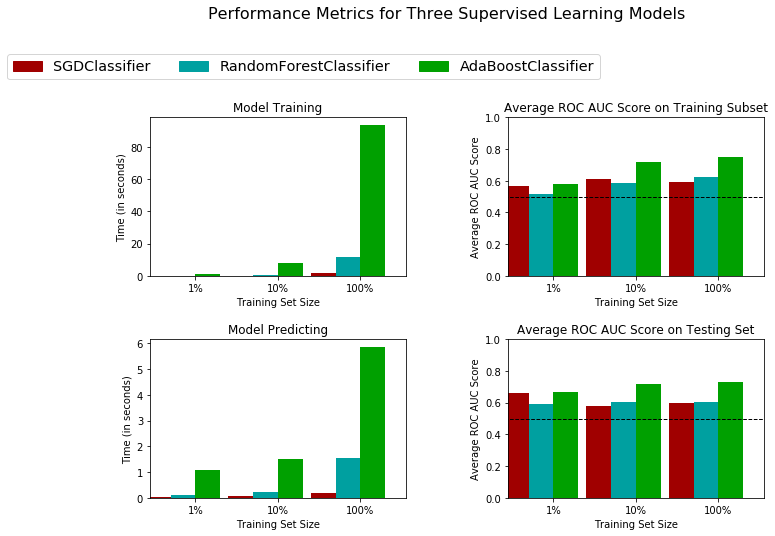

In [11]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, score)

### Model Tuning

In [26]:
# Cross-Validating Grid Search
# parameters = {'algorithm':['SAMME', 'SAMME.R'], 'n_estimators':[50,100,250,500,1000], 'learning_rate':[1, .9, .8, .7],'random_state':[42]}
# Note: This takes the better part of an afternoon on my machine
parameters = {'algorithm':['SAMME.R'], 
              'n_estimators':[100,500], 
              'base_estimator__max_depth': [1, 2, 3, 4, 5], 
              'base_estimator__criterion': ["gini", "entropy"],
              'base_estimator__max_features':['auto','log2']  
             }

dtc = DecisionTreeClassifier(random_state=42)
learner = AdaBoostClassifier(base_estimator=dtc, learning_rate = 1, random_state=42)

clf = GridSearchCV(learner, parameters, scoring='roc_auc', return_train_score=True, refit=True)
clf.fit(application_train_noID, target_train)




GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1, n_estimators=50, random_state=42),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'algorithm': ['SAMME.R'], 'n_estimators': [100, 500], 'base_estimator__max_depth': [1, 2, 3, 4, 5], 'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [35]:
df_results = pd.DataFrame(data=clf.cv_results_).sort_values('rank_test_score')
display(df_results)
print()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_base_estimator__criterion,param_base_estimator__max_depth,param_base_estimator__max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
21,53.152014,0.109373,8.146164,0.038629,SAMME.R,entropy,1,auto,500,"{'algorithm': 'SAMME.R', 'base_estimator__crit...",0.748423,0.745651,0.752123,0.748733,0.002651,1,0.765090,0.766607,0.764690,0.765462,0.000825
1,53.304192,0.364007,8.394567,0.202934,SAMME.R,gini,1,auto,500,"{'algorithm': 'SAMME.R', 'base_estimator__crit...",0.748687,0.745730,0.750567,0.748328,0.001991,2,0.765102,0.766529,0.764167,0.765266,0.000971
23,43.227455,0.020689,8.173357,0.053236,SAMME.R,entropy,1,log2,500,"{'algorithm': 'SAMME.R', 'base_estimator__crit...",0.745611,0.741351,0.748342,0.745101,0.002877,3,0.761310,0.761657,0.760813,0.761260,0.000346
3,43.426763,0.130751,8.219185,0.015289,SAMME.R,gini,1,log2,500,"{'algorithm': 'SAMME.R', 'base_estimator__crit...",0.744471,0.741625,0.746619,0.744238,0.002046,4,0.760655,0.761796,0.760440,0.760964,0.000595
20,11.199355,0.022861,1.723020,0.003986,SAMME.R,entropy,1,auto,100,"{'algorithm': 'SAMME.R', 'base_estimator__crit...",0.740590,0.738150,0.741875,0.740205,0.001545,5,0.746315,0.747622,0.746442,0.746793,0.000588
0,11.293235,0.139632,1.750746,0.011186,SAMME.R,gini,1,auto,100,"{'algorithm': 'SAMME.R', 'base_estimator__crit...",0.739814,0.738229,0.741070,0.739704,0.001162,6,0.746670,0.747747,0.746117,0.746845,0.000677
24,15.842654,0.060708,1.762116,0.004660,SAMME.R,entropy,2,auto,100,"{'algorithm': 'SAMME.R', 'base_estimator__crit...",0.736183,0.733887,0.738221,0.736097,0.001770,7,0.757219,0.758858,0.757027,0.757701,0.000821
4,15.742993,0.021085,1.770582,0.002502,SAMME.R,gini,2,auto,100,"{'algorithm': 'SAMME.R', 'base_estimator__crit...",0.736078,0.732490,0.739296,0.735954,0.002780,8,0.755335,0.757989,0.757483,0.756936,0.001150
26,28.243786,4.500313,4.923887,0.390919,SAMME.R,entropy,2,log2,100,"{'algorithm': 'SAMME.R', 'base_estimator__crit...",0.735065,0.731783,0.738631,0.735160,0.002796,9,0.752241,0.752523,0.750340,0.751701,0.000969
22,9.275491,0.014686,1.732598,0.007945,SAMME.R,entropy,1,log2,100,"{'algorithm': 'SAMME.R', 'base_estimator__crit...",0.734994,0.731545,0.737341,0.734627,0.002380,10,0.741542,0.742327,0.740289,0.741386,0.000839


- Best Parameters: {'algorithm': 'SAMME.R', 'base_estimator_ _criterion': 'entropy', 'base_estimator_ _max_depth': 1, 'base_estimator_ _max_features': 'auto', 'n_estimators': 500}
- Best Score: 0.7487326537020242

In [43]:
# Just print the winning results
print("Best Parameters: {0}".format(clf.cv_results_['params'][clf.best_index_]))
print("Best Score: {0}".format(clf.best_score_))

Best Parameters: {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 1, 'base_estimator__max_features': 'auto', 'n_estimators': 500}
Best Score: 0.7487326537020242


### Model Optimization Results

###### Naive Model

Naive Predictor:
- 0.5

Optimized Model: 
- 0.7506304243694171

Optimized Parameters: 
- {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 500, 'random_state': 42}


### Generate K-Fold Cross-Validation Score

#### Unoptimized

In [82]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
score = cross_val_score(clf, X_test, y_test, scoring='roc_auc')   

In [83]:
print("K-Fold Cross-Validated Score: {0}".format(np.mean(score)))

K-Fold Cross-Validated Score: 0.7294682667290626


In [84]:
predictions = clf.predict(X_test)
score = roc_auc_score(y_test, predictions)
print("Score (ROC AUC) Test: {0}".format(score))

Score (ROC AUC) Test: 0.50757267761736


#### Optimized

In [86]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='auto', random_state=42)
clf = AdaBoostClassifier(base_estimator=dtc, algorithm='SAMME.R', n_estimators = 500)
clf.fit(X_train, y_train)
score = cross_val_score(clf, X_test, y_test, scoring='roc_auc')   

In [87]:
print("K-Fold Cross-Validated Score: {0}".format(np.mean(score)))

K-Fold Cross-Validated Score: 0.7227838911832057


In [88]:
predictions = clf.predict(X_test)
score = roc_auc_score(y_test, predictions)
print("Score (ROC AUC) Test: {0}".format(score))

Score (ROC AUC) Test: 0.5100730974376451


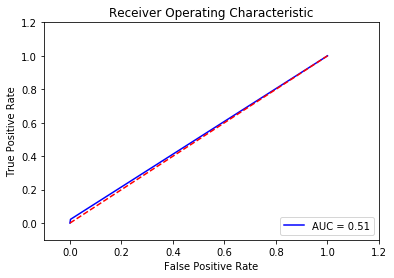

In [89]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Feature Importance

In [46]:
#clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)

In [92]:
# Precalculate this for the Dimensionality Reduction section
#original_predictions = clf.predict(X_test)
original_predictions = predictions
original_pred_sum = np.sum(original_predictions)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]


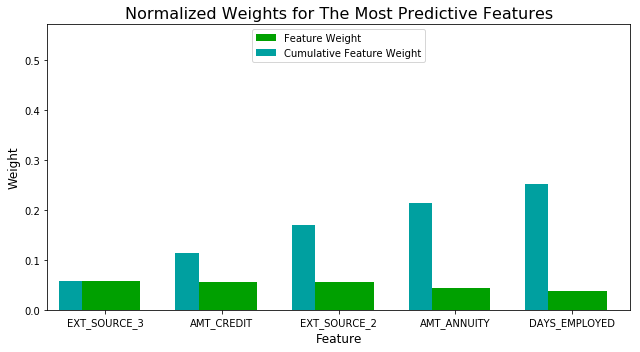

array(['EXT_SOURCE_3', 'AMT_CREDIT', 'EXT_SOURCE_2', 'AMT_ANNUITY',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'AMT_GOODS_PRICE', 'EXT_SOURCE_1',
       'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'TOTALAREA_MODE',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE',
       'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'APARTMENTS_MODE', 'LANDAREA_AVG',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'REGION_RATING_CLIENT', 'OWN_CAR_AGE',
       'YEARS_BUILD_AVG', 'LIVINGAREA_MEDI', 'COMMONAREA_AVG',
       'NONLIVINGAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_MODE',
       'FLOORSMIN_MEDI', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'ENTRANCES_MODE', 'AMT_REQ_CREDIT_BUREAU_MON', 'ELEVATORS_MEDI',
       'ORGANIZATION_TYPE_Business Entity Type 3', 'APARTMENTS_AVG',
       'COMMONAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'YEARS_BUILD_MODE',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
  

In [93]:
# Plot
vs.feature_plot(importances, X_train, y_train)

display(X_train.columns.values[indices[:100]])

### Dimensionality Reduction
Just looking at what we could reasonably achieve with dimensionality reduction at this point.  We're not going to actually do it yet, but I'm curious.

In [97]:
# Create a model with the reduced feature space
fields = X_train.columns.values[(np.argsort(importances)[::-1])[:40]]

reduced_clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=500, random_state=42)
#reduced_score = cross_val_score(reduced_clf, application_train[fields], test_train, scoring='roc_auc', n_jobs=-1)

# Reduce the feature space
X_train_reduced = X_train[fields]
X_test_reduced = X_test[fields]

reduced_clf.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = reduced_clf.predict(X_test_reduced)
reduced_pred_sum = np.sum(reduced_predictions)

In [98]:
# Report scores from the final model using both versions of data
print("Final Model trained on full data (ROC AUC): {0}, Records Predicted {1}".format(roc_auc_score(y_test, original_predictions), original_pred_sum))
print("Final Model trained on reduced data (ROC AUC): {0}, Records Predicted {1}".format(roc_auc_score(y_test, reduced_preductions), reduced_pred_sum))

Final Model trained on full data (ROC AUC): 0.5100730974376451, Records Predicted 231


NameError: name 'reduced_preductions' is not defined

In [ ]:
# Export strong correlations for later use
df_fields = pd.DataFrame(data=fields, columns=['features'])
df_fields.to_csv('data/tmp/bureau_important_fields.csv')

### Generate Kaggle Submission

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=500, random_state=42)
clf.fit(application_train_noID, target_train)
predictions = clf.predict(application_test_noID)

In [ ]:
# This is prohibitively expensive with 1000 estimators
#score = cross_val_score(clf, application_train_noID, target_train, scoring='roc_auc', n_jobs=-1)
#print("Kaggle Submission trained on full data (ROC AUC): {0}".format(score))

In [ ]:
d = {'SK_ID_CURR': application_test['SK_ID_CURR'], 'TARGET': predictions}
sub = pd.DataFrame(data=d)

print("Number of records flagged {0}".format(np.sum(sub['TARGET'])))

sub.to_csv('data/tmp/submission_bureau.csv', index=False)

### Kaggle Results

#### With Outliers: 
Score 0.505 (ROC AUC)

In [ ]:
# last submission - 0.505... 
